Importing the libraries and dataset. Also taking a look at the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,risk,latitude,longitude,victims,deadly_victims,length,num_points,in_place,Rain,sliding
0,1,0,0.0,0.0,0,0,0,0,0,0.60,1
1,1,0,0.0,0.0,0,0,0,0,0,0.60,1
2,1,0,0.0,0.0,0,0,0,0,0,0.13,1
3,1,0,0.0,0.0,0,0,0,0,0,2.17,1
4,1,0,0.0,0.0,0,0,0,0,0,93.60,1


In [2]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46054 entries, 0 to 46053
Data columns (total 11 columns):
situation         46054 non-null int64
risk              46054 non-null int64
latitude          46054 non-null float64
longitude         46054 non-null float64
victims           46054 non-null int64
deadly_victims    46054 non-null int64
length            46054 non-null int64
num_points        46054 non-null int64
in_place          46054 non-null int64
Rain              46053 non-null float64
sliding           46054 non-null int64
dtypes: float64(3), int64(8)
memory usage: 3.9 MB


While we don't fill the latitude/longitude values we will remove those rows with zero values for training.

In [3]:
slidings = slidings[slidings.latitude!=0]
slidings.head()

,situation,risk,latitude,longitude,victims,deadly_victims,length,num_points,in_place,Rain,sliding
9,1,0,-8.053903,-34.884002,0,0,0,0,0,0.0,1
10,1,0,-8.037556,-34.898524,0,0,0,0,0,3.1,1
11,1,0,-8.037269,-34.898401,0,0,0,0,0,5.4,1
12,1,0,-8.037253,-34.893943,0,0,0,0,0,70.5,1
13,1,0,-8.037253,-34.893943,0,0,0,0,0,70.5,1


In [4]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33009 entries, 9 to 46053
Data columns (total 11 columns):
situation         33009 non-null int64
risk              33009 non-null int64
latitude          33009 non-null float64
longitude         33009 non-null float64
victims           33009 non-null int64
deadly_victims    33009 non-null int64
length            33009 non-null int64
num_points        33009 non-null int64
in_place          33009 non-null int64
Rain              33009 non-null float64
sliding           33009 non-null int64
dtypes: float64(3), int64(8)
memory usage: 3.0 MB


In this notebook we will be evaluating the RandomForestRegressor algorithm. Random state will be set to 2. We will start with the default hyperparameters.

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = slidings.drop(columns='sliding',axis=1)
y= slidings['sliding']

model = RandomForestRegressor()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Evaluating the model with the default hyperparameters.

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4433
           1       0.89      0.76      0.82      2169

    accuracy                           0.89      6602
   macro avg       0.89      0.86      0.87      6602
weighted avg       0.89      0.89      0.89      6602



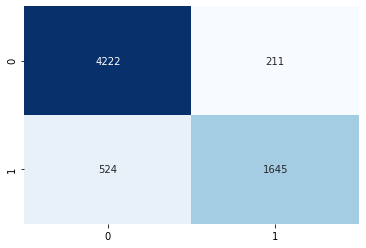

In [6]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)
predictions = np.round(predictions,decimals=0)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

We will now variate the maximum depth and the number of estimators, and compare the precision of the model guessing there was a sliding(1) and the accuracy.

The maximum precision for  2  depth found was  0.954  with  5  estimators.
The maximum accuracy for  2  depth found was  0.895  with  5  estimators.

The maximum precision for  3  depth found was  0.966  with  15  estimators.
The maximum accuracy for  3  depth found was  0.897  with  10  estimators.

The maximum precision for  4  depth found was  0.965  with  30  estimators.
The maximum accuracy for  4  depth found was  0.896  with  30  estimators.

The maximum precision for  5  depth found was  0.966  with  5  estimators.
The maximum accuracy for  5  depth found was  0.896  with  75  estimators.

The maximum precision for  6  depth found was  0.966  with  15  estimators.
The maximum accuracy for  6  depth found was  0.897  with  20  estimators.

The maximum precision for  7  depth found was  0.968  with  85  estimators.
The maximum accuracy for  7  depth found was  0.898  with  85  estimators.



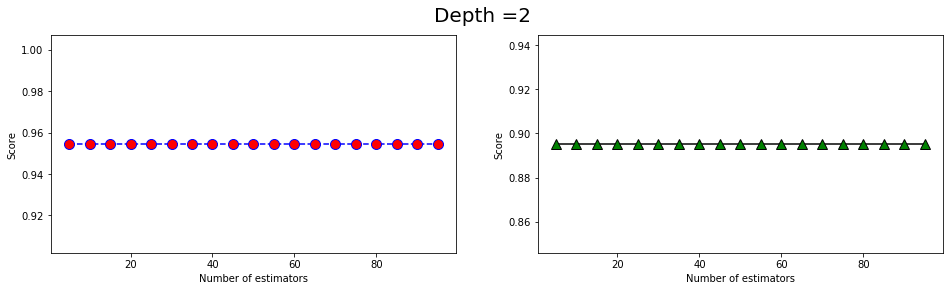

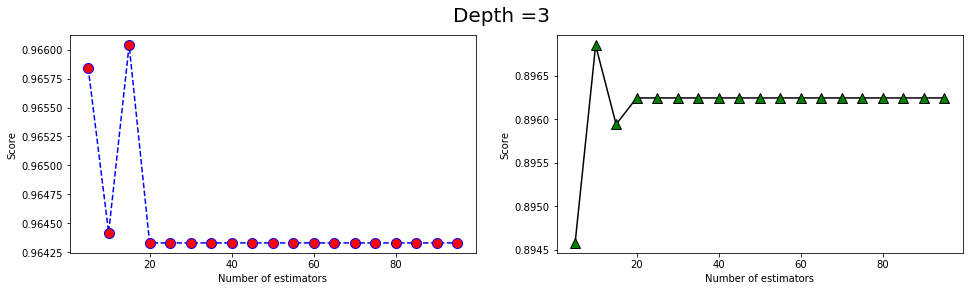

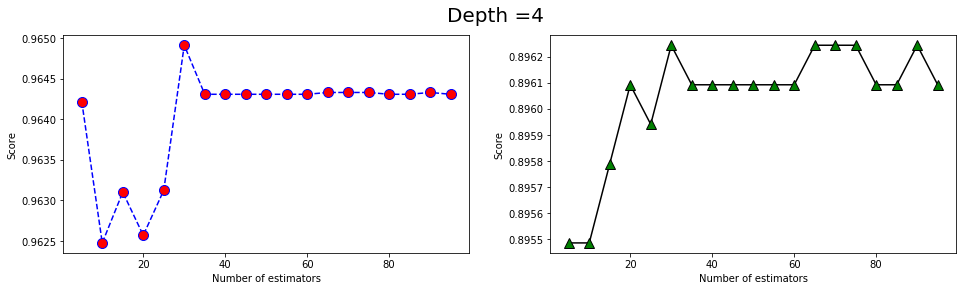

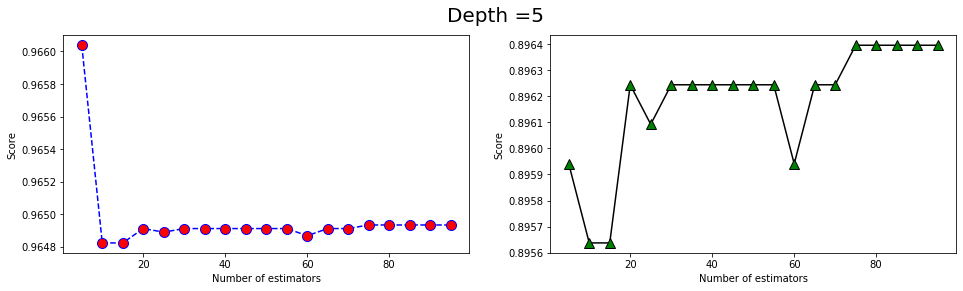

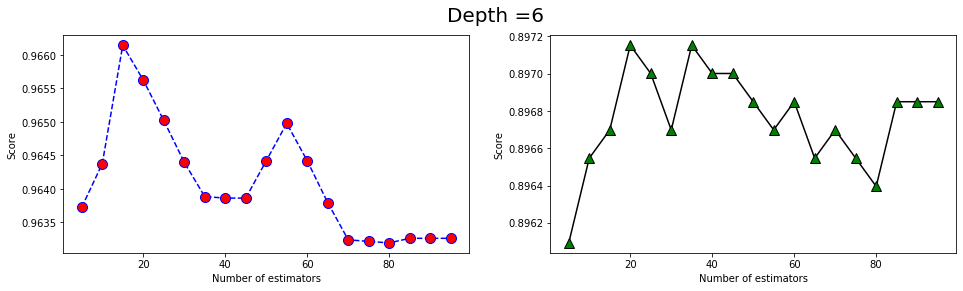

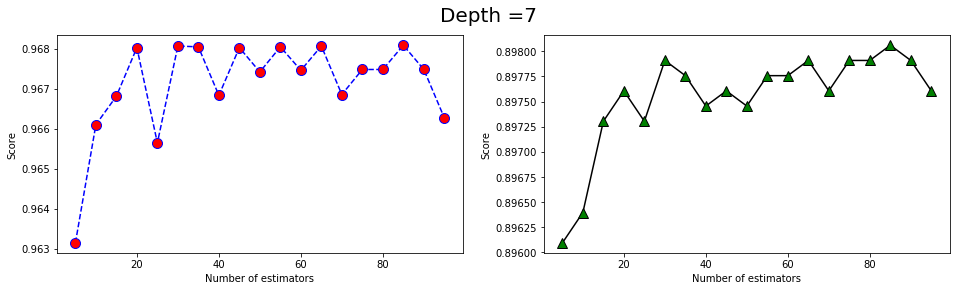

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score

for depth in range (2,8):
    precision = []
    accuracy = []
    for estimators in range(5,100,5):
        model = RandomForestRegressor(n_estimators=estimators,max_depth=depth,random_state=2)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        predictions = np.round(predictions,decimals=0)
        precision.append(precision_score(y_test,predictions,average=None)[1])
        accuracy.append(accuracy_score(y_test,predictions))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))
    fig.suptitle('Depth ='+str(depth),fontsize=20)
    ax1.plot(range(5,100,5),precision,label='Precision',color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10,)
    ax2.plot(range(5,100,5),accuracy,label='Accuracy',color='black',marker='^', markerfacecolor='green',markersize=10)
    ax1.set(xlabel='Number of estimators', ylabel='Score')
    ax2.set(xlabel='Number of estimators', ylabel='Score')
    print('The maximum precision for ',depth,' depth found was ','%.3f' %max(precision),' with ',precision.index(max(precision))*5+5,' estimators.')
    print('The maximum accuracy for ',depth,' depth found was ','%.3f' %max(accuracy),' with ',accuracy.index(max(accuracy))*5+5,' estimators.\n')
    



After depth 3 the variation for both the precision and accuracy is only on the third decimal case, and at depth 4 the best precision and accuracy coincide on the number of estimators, so we'll go on with depth = 4 and estimators = 30, and take a more in depth look with these hyperparameters.

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      4433
           1       0.96      0.71      0.82      2169

    accuracy                           0.90      6602
   macro avg       0.92      0.85      0.87      6602
weighted avg       0.90      0.90      0.89      6602



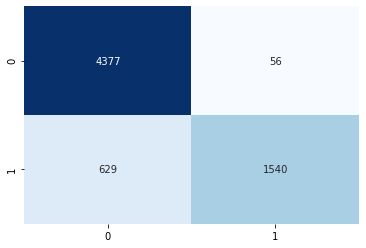

In [24]:
model = RandomForestRegressor(n_estimators=30,max_depth=4,random_state=2)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions = np.round(predictions,decimals=0)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [25]:
model.score(X,y)

0.6119884170599446

Validating with cross validation.

In [26]:
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=30,max_depth=4,random_state=2)
scores = cross_val_score(model, X, y, cv=10)
scores

array([0.5786287 , 0.75155116, 0.49169742, 0.59751035, 0.45204265,
       0.94839772, 0.55785886, 0.17237066, 0.84780129, 0.529512  ])

In [27]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.59 (+/- 0.41)


In [28]:
model = RandomForestRegressor(n_estimators=30,max_depth=4,random_state=2)
scores = cross_val_score(model, X, y, cv=10, scoring='r2')
scores

array([0.5786287 , 0.75155116, 0.49169742, 0.59751035, 0.45204265,
       0.94839772, 0.55785886, 0.17237066, 0.84780129, 0.529512  ])